In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import pickle
import joblib

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest as skb
from sklearn.feature_selection import f_regression

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [11]:
data = pd.read_csv('diamonds.csv')
data.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

In [13]:
data.isnull().sum()

Unnamed: 0                          0
cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                143491
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1650
fancy_color_intensity               0
total_sales_price                   0
dtype: int64

In [14]:
data = data.drop(columns='Unnamed: 0')
data.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [15]:
data.nunique()

cut                               11
color                             11
clarity                           11
carat_weight                     878
cut_quality                        6
lab                                3
symmetry                           5
polish                             5
eye_clean                          5
culet_size                         9
culet_condition                    4
depth_percent                    534
table_percent                    235
meas_length                     1415
meas_width                      1155
meas_depth                       852
girdle_min                        10
girdle_max                        10
fluor_color                        6
fluor_intensity                    7
fancy_color_dominant_color        13
fancy_color_secondary_color       11
fancy_color_overtone               8
fancy_color_intensity             10
total_sales_price              22202
dtype: int64

In [16]:
data = data.drop_duplicates()

In [17]:
le = LabelEncoder()
df = data.copy()
for i in data:
    r = data[i].dtypes
    if r == 'object':
        df[i] = le.fit_transform(data[i])
        joblib.dump(le,i+'.h5',compress=9)

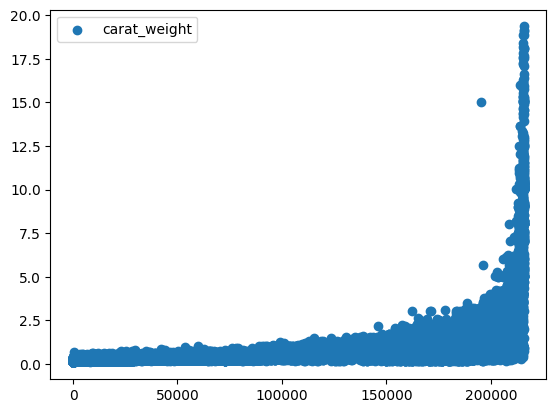

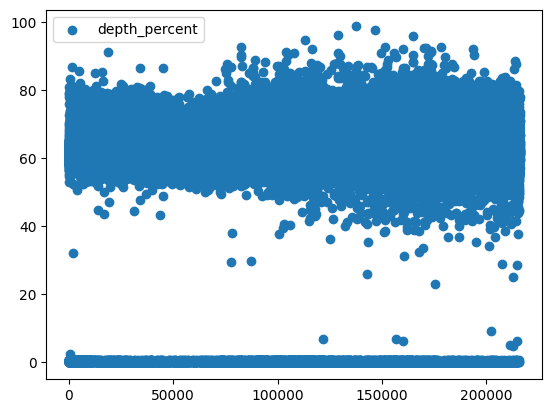

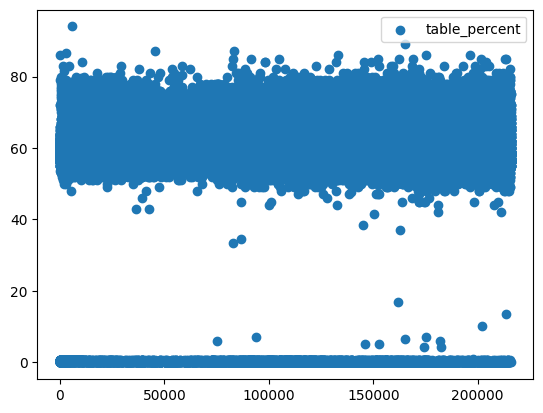

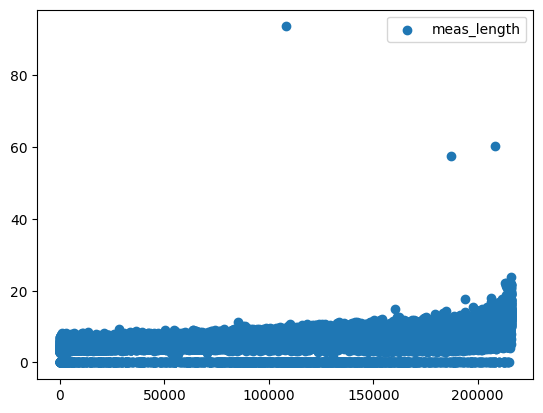

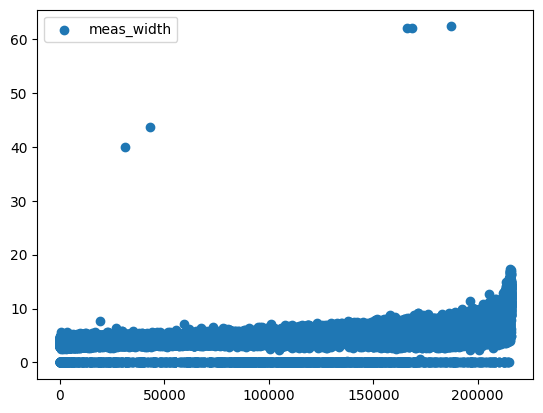

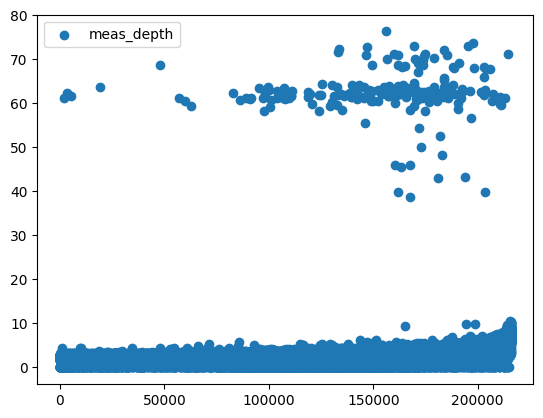

In [18]:
for i in df:
    r = df[i].dtypes
    if r == 'float64':
        plt.scatter(range(len(df[i])) , df[i] , label=i)
        plt.legend()
        plt.show()

In [19]:
df = df[(df.meas_length < 40)]
df = df[(df.meas_width < 30)]
df = df[(df.meas_depth < 30)]

In [20]:
df2 = df.copy()

In [21]:
df2 = df2[(df2.meas_width != 0)]
df2 = df2[(df2.meas_depth != 0)]
df2 = df2[(df2.meas_length != 0)]
df2 = df2[(df2.depth_percent != 0)]
df2 = df2[(df2.table_percent != 0)]

print(df.shape)
print(df2.shape)

(215599, 25)
(210513, 25)


<Axes: >

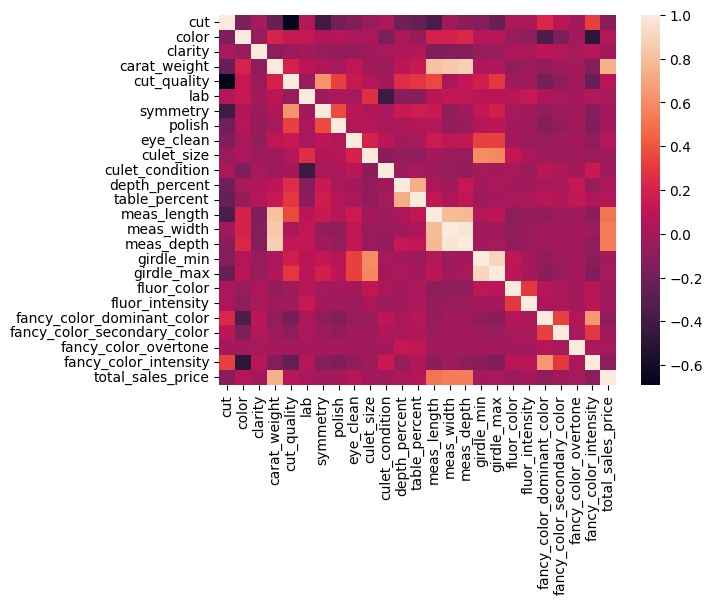

In [22]:
corr = df2.corr()
sns.heatmap(corr)

In [23]:
features = []
for i in df2:
    if i != 'total_sales_price':
        features.append(i)
print(features)

['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


In [24]:
X = df2[features]
y = df2['total_sales_price']

In [25]:
fs = skb(f_regression , k='all')
fs.fit(X , y)
for i in range(len(fs.scores_)):
    print(f'Featured {i} : {fs.scores_[i]}')

Featured 0 : 2350.245824830287
Featured 1 : 762.7458345122935
Featured 2 : 7.404681099810095
Featured 3 : 262560.9228417938
Featured 4 : 1256.060366118375
Featured 5 : 51.814592060744985
Featured 6 : 15.197575443276655
Featured 7 : 0.7552015160088846
Featured 8 : 699.8420380477492
Featured 9 : 61.5991921463693
Featured 10 : 93.9007012950647
Featured 11 : 178.09766851032217
Featured 12 : 796.5647829578521
Featured 13 : 73702.35200682117
Featured 14 : 87254.21432062791
Featured 15 : 87641.85496118732
Featured 16 : 0.24659471139768693
Featured 17 : 9.204294845978456
Featured 18 : 191.82995841704565
Featured 19 : 1.741475102028887
Featured 20 : 1217.8653249528854
Featured 21 : 114.2913350128461
Featured 22 : 6.850899043258772
Featured 23 : 1492.602214907268


In [26]:
fs = skb(f_regression , k=15)
Xnew = fs.fit_transform(X , y)
f = np.array(features)
filt = fs.get_support()
f = f[filt]
print(f , len(f))

['cut' 'color' 'carat_weight' 'cut_quality' 'eye_clean' 'culet_condition'
 'depth_percent' 'table_percent' 'meas_length' 'meas_width' 'meas_depth'
 'fluor_color' 'fancy_color_dominant_color' 'fancy_color_secondary_color'
 'fancy_color_intensity'] 15


In [27]:
Xnew = X
y = y.values.reshape(-1 , 1)

In [28]:
X_train , X_test , y_train , y_test = train_test_split(Xnew , y, test_size=0.2 , random_state=1441)
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(168410, 24) (168410, 1)
(42103, 24) (42103, 1)


In [29]:
model = Sequential()
model.add(Dense(units=100 , input_dim = 24 , kernel_initializer='normal' , activation='relu'))
model.add(Dense(units=50 , kernel_initializer='normal' , activation='relu'))
model.add(Dense(units=1 , kernel_initializer='normal'))

model.compile(loss='mean_squared_error' , optimizer='adam')

D:\projects\Data Science\DiamondSellPrice\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
history = model.fit(X_train , y_train , validation_split=0.2 , batch_size=2000 , epochs=100 , verbose=1)

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 723279936.0000 - val_loss: 686890688.0000
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 754318464.0000 - val_loss: 653856384.0000
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 666920448.0000 - val_loss: 634840320.0000
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 621256960.0000 - val_loss: 632726720.0000
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 613179776.0000 - val_loss: 629981568.0000
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 605391232.0000 - val_loss: 626174976.0000
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 632373632.0000 - val_loss: 620419584.0000
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 661869568.0000 - val_loss: 610765568.0000
Epoch 9/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 646246336.0000 - val_loss: 594275648.0000
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 693899328.0000 - val_loss: 5676

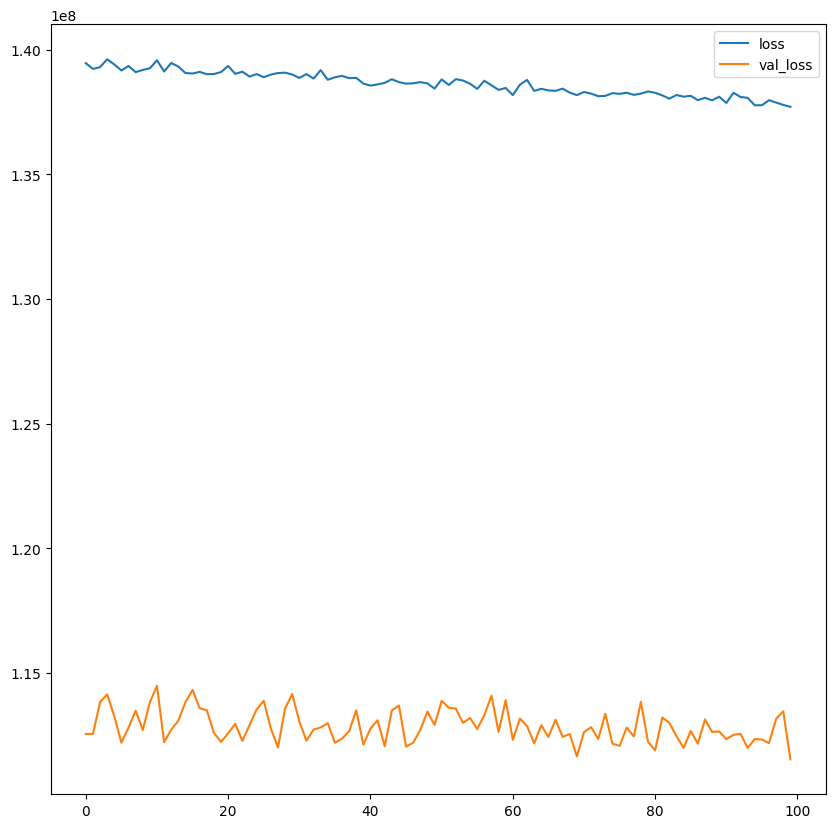

In [31]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.show()

In [32]:
pred = model.predict(X_test)
r2 = r2_score(y_test , pred)*100
print(f'R Squared : {r2}')

1316/1316 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
R Squared : 76.56066417694092


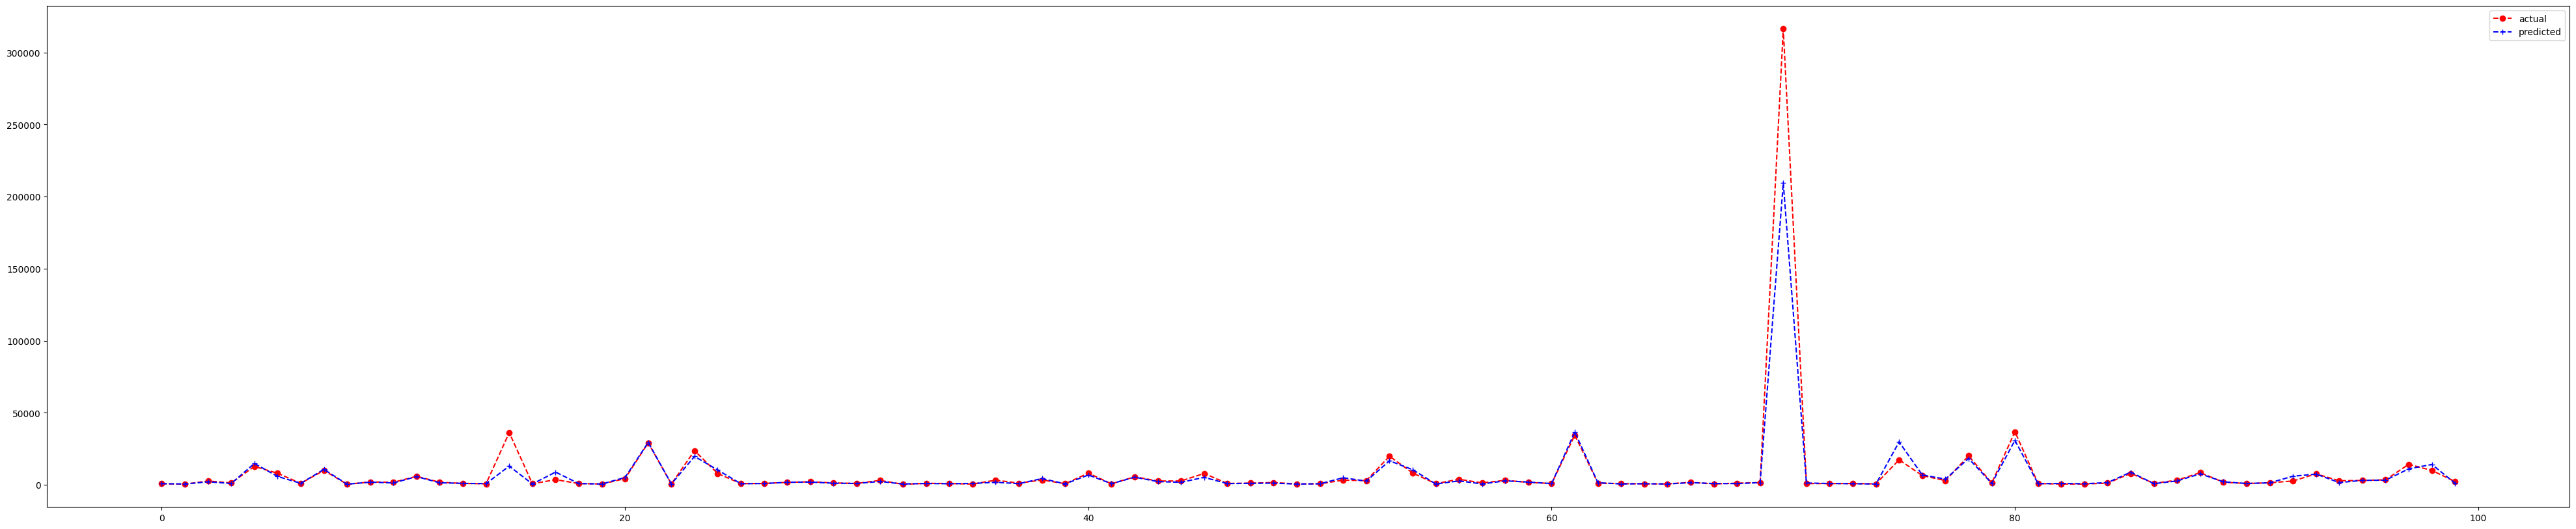

In [33]:
plt.figure(figsize=(50 , 10))
plt.plot(y_test[5000:5100] , 'ro--' , label='actual')
plt.plot(pred[5000:5100] , 'b+--' , label='predicted')
plt.legend()
plt.show()

In [34]:
model.save('model.h5')